In [1]:
import subprocess
import os
import glob
import shutil
import yaml
import argparse
import xarray as xr
import matplotlib.pyplot as plt
from functions import preproc_nemo_T
from functions import moving_average
from functions import dateDecimal
expname='beth'
expdir=os.path.join('/ec/res4/scratch/itas/ece4/', expname, 'output', 'nemo')

In [2]:
domain = xr.open_dataset(os.path.join(expdir, '..', '..', 'domain_cfg.nc'))
vol = domain['e1t']*domain['e2t']*domain['e3t_0']
area = domain['e1t']*domain['e2t']
sect = domain['e2t']*domain['e3t_0']
dz = domain['e3t_0']

In [3]:
start_year = 1990
end_year = 2005
filelist = []
for year in range(start_year, end_year):
    pattern = os.path.join(expdir, f"{expname}_oce_1m_T_{year}-{year}.nc")
    matching_files = glob.glob(pattern)
    filelist.extend(matching_files)
data = xr.open_mfdataset(filelist, preprocess=preproc_nemo_T)
data

<xarray.Dataset>
Dimensions:               (y: 148, x: 180, time: 180, z: 31, axis_nbounds: 2)
Coordinates:
    nav_lat_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lon_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 1990-01-16T12:00:00 ... 2004-...
  * z                     (z) float32 -5.0 -15.0 -25.0 ... -4.75e+03 -5.25e+03
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/25)
    deptht_bounds         (time, z, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    thetao                (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so                    (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    ...                    ...
    qt_oce                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx                   (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum                  (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre               (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
Attributes:
    name:         output/nemo/beth_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-06 16:20:01 GMT
    uuid:         f988ad4a-11b5-4141-98ec-d51254cbf4e5

In [4]:
tt = dateDecimal(data['time'].values)
toa = moving_average(data.thetao.weighted(vol).mean(dim=['z', 'y', 'x']).values.flatten(),12)

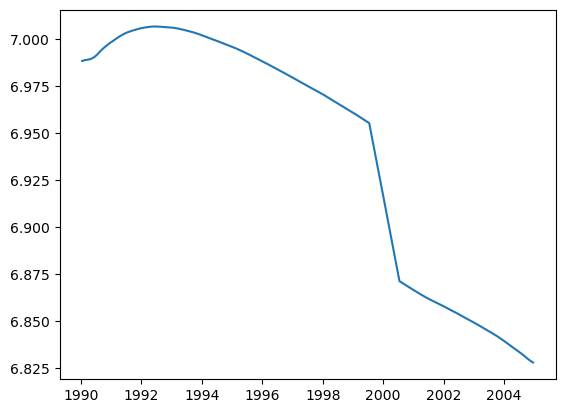

In [5]:
plt.plot(tt,toa)